In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\hp\Downloads\Social Media Users.csv")
data

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined
0,WhatsApp,Meta,Messaging,Switzerland,113.94,Yes,2019-03-03
1,WeChat,Tencent,Messaging and social media,Madagascar,49.63,Yes,2023-09-21
2,Snapchat,Snap Inc.,Multimedia messaging,Pitcairn Islands,29.01,Yes,2020-12-13
3,Instagram,Meta,Photo and video sharing,Timor-Leste,295.43,Yes,2019-04-21
4,Threads,Meta,Text-based social networking,Bermuda,71.78,No,2015-07-14
...,...,...,...,...,...,...,...
9995,Pinterest,Pinterest Inc.,Visual discovery and bookmarking,Morocco,249.12,No,2024-04-23
9996,Reddit,Reddit Inc.,Discussion forums and communities,Cape Verde,111.38,Yes,2017-03-06
9997,Quora,Quora Inc.,Q&A knowledge sharing,Poland,87.88,No,2018-05-17
9998,Quora,Quora Inc.,Q&A knowledge sharing,Lao People's Democratic Republic,205.69,Yes,2019-10-07


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Platform                10000 non-null  object 
 1   Owner                   10000 non-null  object 
 2   Primary Usage           10000 non-null  object 
 3   Country                 10000 non-null  object 
 4   Daily Time Spent (min)  10000 non-null  float64
 5   Verified Account        10000 non-null  object 
 6   Date Joined             10000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [4]:
data.shape

(10000, 7)

In [5]:
data.isna().sum()

Platform                  0
Owner                     0
Primary Usage             0
Country                   0
Daily Time Spent (min)    0
Verified Account          0
Date Joined               0
dtype: int64

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent (min),10000.0,152.211145,85.14275,5.02,78.92,152.735,225.6425,300.0


# DATA VISUALISING

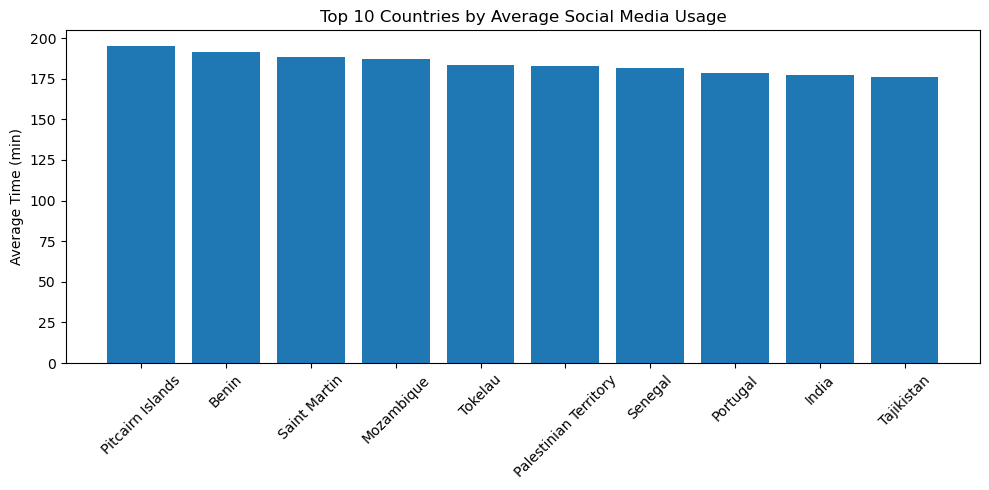

In [7]:
import matplotlib.pyplot as plt
top_countries = data.groupby("Country")["Daily Time Spent (min)"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top_countries.index, top_countries.values)
plt.title("Top 10 Countries by Average Social Media Usage")
plt.ylabel("Average Time (min)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

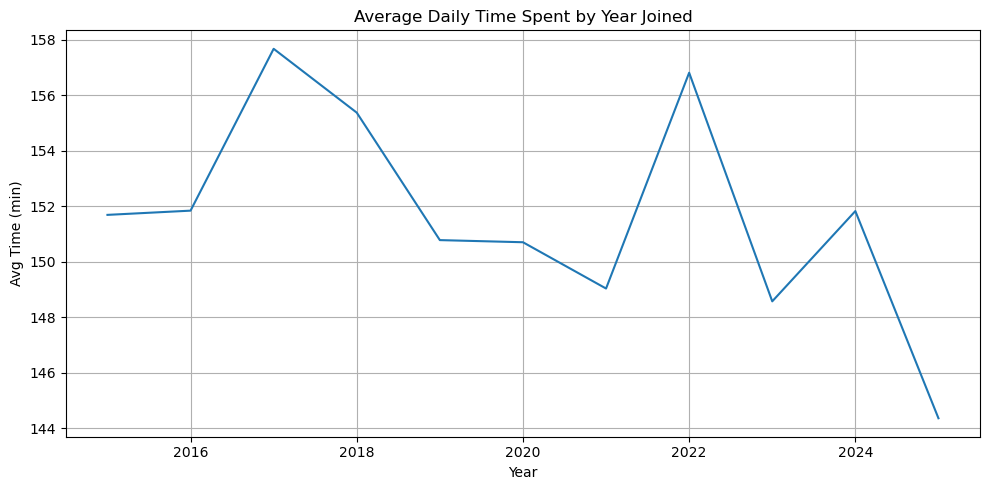

In [8]:
data["Date Joined"] = pd.to_datetime(data["Date Joined"])
data["Year Joined"] = data["Date Joined"].dt.year

yearly_trend = data.groupby("Year Joined")["Daily Time Spent (min)"].mean()

plt.figure(figsize=(10,5))
plt.plot(yearly_trend.index, yearly_trend.values)
plt.title("Average Daily Time Spent by Year Joined")
plt.xlabel("Year")
plt.ylabel("Avg Time (min)")
plt.grid(True)
plt.tight_layout()
plt.show()

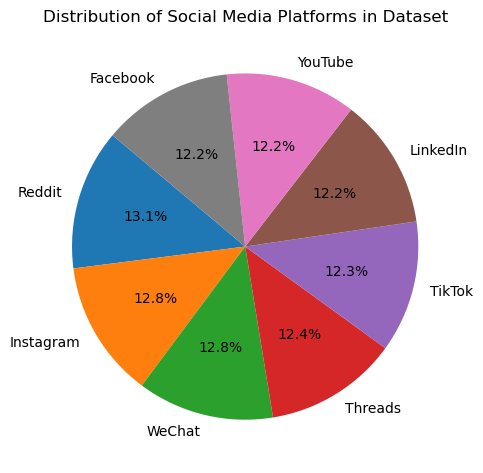

In [9]:
import matplotlib.pyplot as plt

# Count occurrences of each platform
platform_counts = data["Platform"].value_counts().head(8)   # top 8 platforms for neat visualization

plt.figure(figsize=(5,5))
plt.pie(platform_counts.values, labels=platform_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Social Media Platforms in Dataset")
plt.tight_layout()
plt.show()

# DATA PREPROCESSING

In [10]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()

data["Platform"] = le1.fit_transform(data["Platform"])
data["Owner"] = le2.fit_transform(data["Owner"])
data["Primary Usage"] = le3.fit_transform(data["Primary Usage"])
data["Country"] = le4.fit_transform(data["Country"])
data["Verified Account"] = le5.fit_transform(data["Verified Account"])

In [11]:
data.head()

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined,Year Joined
0,11,2,1,210,113.94,1,2019-03-03,2019
1,10,9,2,127,49.63,1,2023-09-21,2023
2,6,7,4,172,29.01,1,2020-12-13,2020
3,1,2,5,216,295.43,1,2019-04-21,2019
4,8,2,10,23,71.78,0,2015-07-14,2015


In [12]:
data=data.drop(["Date Joined","Year Joined"],axis=1)
data.head()

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account
0,11,2,1,210,113.94,1
1,10,9,2,127,49.63,1
2,6,7,4,172,29.01,1
3,1,2,5,216,295.43,1
4,8,2,10,23,71.78,0


In [13]:
x=data.drop("Primary Usage",axis=1)
y=data["Primary Usage"]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Data Modeling

In [16]:
#logistic regression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
print("Primary Usage:",log_model.score(x_train,y_train))
print("Primary Usage:",log_model.score(x_test,y_test))

Primary Usage: 1.0
Primary Usage: 1.0


In [17]:
#Randomforest classifier
ran_model=RandomForestClassifier()
ran_model.fit(x_train,y_train)
print("Primary Usage:",ran_model.score(x_train,y_train))
print("Primary Usage:",ran_model.score(x_test,y_test))

Primary Usage: 1.0
Primary Usage: 1.0


In [18]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dec_model=DecisionTreeClassifier()
dec_model.fit(x_train,y_train)
print("Primary Usage:",dec_model.score(x_train,y_train))
print("Primary Usage:",dec_model.score(x_test,y_test))

Primary Usage: 1.0
Primary Usage: 1.0


In [19]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
print("Primary Usage:",knn_model.score(x_train,y_train))
print("Primary Usage:",knn_model.score(x_test,y_test))

Primary Usage: 0.99775
Primary Usage: 0.989


# cross validation

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
scores = cross_val_score(dec_model,x,y, cv=5)
score=scores.mean()

In [22]:
score

np.float64(1.0)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

# Saving model

In [26]:
import pickle

In [27]:
with open("dec_model_pickle.pkl","wb") as model_file:
    pickle.dump(dec_model,model_file)

In [28]:
with open("dec_model_pickle.pkl","rb")as d:
    model=pickle.load(d)

# User input method

In [ ]:
print("\n----- USER INPUT SECTION -----")

platform = int(input("Enter Platform (encoded number): "))
owner = int(input("Enter Owner (encoded number): "))
primary_usage = int(input("Enter Primary Usage (encoded number): "))
country = int(input("Enter Country (encoded number): "))
verified = int(input("Verified Account (1=Yes, 0=No): "))

# Convert to DF for prediction
user_data = pd.DataFrame([[platform, owner, primary_usage, country, verified]],
                         columns=x.columns)

# Predict
prediction = model.predict(user_data)[0]

#print("\nPredicted Daily Time Spent Category:", prediction)


# Output result
if prediction == 1:
    print("\nPREDICTION: This user is likely to have HIGH daily time spent.")
else:
    print("\nPREDICTION: This user is likely to have LOW daily time spent.")


----- USER INPUT SECTION -----


In [ ]:
# print("\n----- USER INPUT SECTION -----")

# platform=input("enter the platform :\n")

# owner=input("enter the owner:\n")

# primary_usage=input("enter the primary_usage:\n")

# Country=input("enter the Country:\n")

# Verified Account=input("enter the Verified Account (1=Yes , 0=No):\n")
